In [1]:
import numpy as np 
import matplotlib.pylab as plt
import pandas as pd
eye=np.eye(5)
print(eye)

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


In [2]:
def plot_data(x,y):
    fig=plt.figure('scatter')
    ax=fig.add_subplot(1,1,1)
    ax.set_xlim([4,25])
    ax.set_ylim([-5,25])
    ax.set_xlabel("Population of City in 10,000s")
    ax.set_ylabel("Profit in $10,000s'")
    ax.set_title("MarkerSize")
    ax.scatter(x, y, color='r',marker='1')
    plt.show()
    
  


In [3]:
def extract_data(file):
    dataFrame=pd.read_csv(file,header=None)
    print(dataFrame.columns)
   
    x=dataFrame[0]
    y=dataFrame[1]
    return x,y
    


Int64Index([0, 1], dtype='int64')


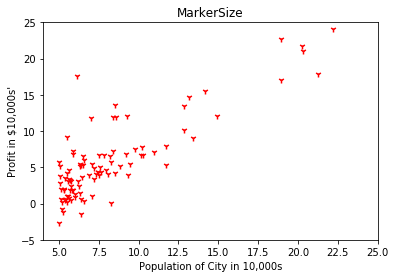

97


In [4]:
x,y=extract_data("ex1data1.csv")
m=y.size
plot_data(x,y)
print(m)


In [5]:
ones=np.ones(m)
X=np.column_stack((ones,x))
theta=np.zeros(2)
iterations = 15000;
alpha = 0.01;


In [8]:
def computeCost(X,y,theta):
    j=0
    h=theta[0]+theta[1]*X[:,1]
    error=h-y
    error_squer=error**2
    
    j=1/(2*m)*np.sum(error_squer)
    return j 

In [9]:
print(computeCost(X,y,theta))

32.0727338775


In [10]:
theta=[-1,2]
print(computeCost(X,y,theta))


54.242455082


In [11]:
def gradientDescent(X,y,alpha,iterations,theta): 
    J_history=np.zeros(iterations)
    print()
    for itere in range(0,iterations) : 
        h=theta[0]+theta[1]*X[:,1]
        temp0=theta[0]-alpha*(1/m)*np.sum((h-y)*X[:,0])
        temp1=theta[1]-alpha*(1/m)*np.sum((h-y)*X[:,1])
        theta=[temp0,temp1]
        J_history[itere]=computeCost(X,y,theta)
    
    
    
    
    return theta,J_history

In [12]:
theta=np.zeros(2)
theta,J_history=gradientDescent(X,y,alpha,iterations,theta)

[-3.8957808783048415, 1.1930336441888891]


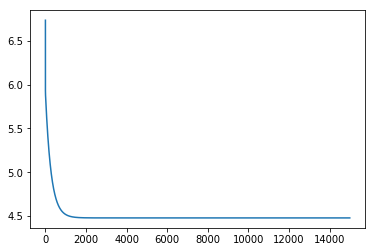

In [15]:
print(theta)
plt.plot(J_history)
plt.show()

# Plot the linear fit

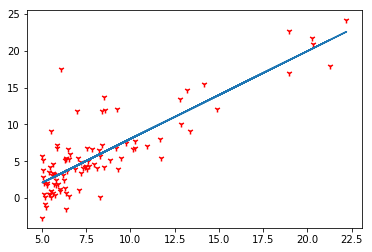

In [16]:
linear_fil=np.dot(X,theta)
plt.scatter(x, y, color='r',marker='1')
plt.plot(X[:,1],linear_fil)
plt.show()

## Visualizing J(theta_0, theta_1)

In [17]:
theta0=np.linspace(-10,10,100)
theta1=np.linspace(-1,4,100)
J_val=np.zeros((theta0.size,theta1.size))



In [18]:
for i  in range (0,theta0.size):
    for j in range(0,theta1.size):
        theta_=[theta0[i],theta1[j]]
        J_val[i,j]=computeCost(X,y,theta_)
        
        

In [19]:
J_val=np.transpose(J_val)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
def Surface_plot ():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(theta1,theta0, J_val)
    plt.show()


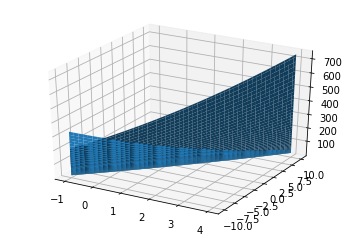

In [20]:
Surface_plot()

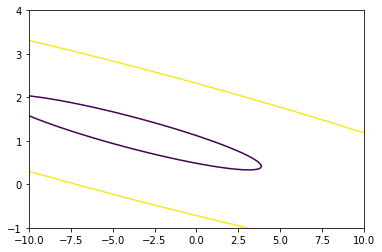

In [21]:
plt.figure()
S1=plt.contour(theta0, theta1, J_val,norm = LogNorm())
#plt.clabel(S1,inline=0,inline_spacing=5,fontsize=8,fmt='%1.0f',colors='b')
plt.show()